## Network Analysis Using Networkx

Networkx is a popular python package for analyzing network and graphs.

Why are networks important to study?

- In social media, once can find social social media influencers.
- In case of transport network one will be able to find the most optimal way to travel between two stations
- Find clusters in network

- What does a network made of?
    - Nodes and edges!
    
<img src="images/NodesAndEdges.png" width="400" height="400">

- Nodes and Edges can have additional data also knows as attributes

<img src="images/node_edge_attrs.png" width="400" height="400">

Let us build some basic network using networkx package:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

Let's us add a few nodes:

In [3]:
G.add_nodes_from([1, 2, 3, 4, 5])

Let's now add some edges

In [4]:
G.add_edges_from([(1, 3), (2, 3), (2, 4), (3, 5)])

We can now visualize this network/graph

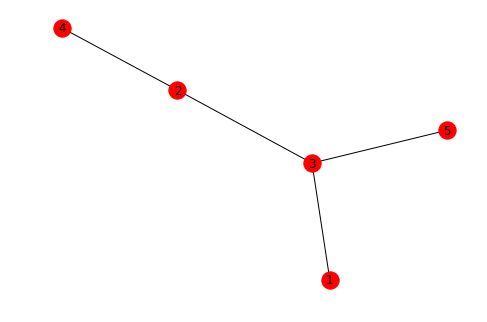

In [7]:
nx.draw(G, with_labels=True)

We can also now add some attributes to these nodes:

Attributes can be added in various manners

In [9]:
G.nodes[1]["label"] = "blue"

In [11]:
G.node.data()

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}, 4: {}, 5: {}})

We can create a dictionary of attributes as well and assign it :

In [12]:
attrs_1 = {2: {"label":"red"}, 3: {"label": "green"} }

In [14]:
nx.set_node_attributes(G, attrs_1)

In [16]:
G.node.data()

NodeDataView({1: {'label': 'blue'}, 2: {'label': 'red'}, 3: {'label': 'green'}, 4: {}, 5: {}})

Attributes similarly can be added to edges as well:

In [24]:
attrs_edges = {(1, 3): {"joined_on": "21-JAN-20"}, (2, 3): {"joined_on": "22-JAN-20"}}

In [25]:
nx.set_edge_attributes(G, attrs_edges)

In [26]:
G.edges.data()

EdgeDataView([(1, 3, {'joined_on': '21-JAN-20'}), (2, 3, {'joined_on': '22-JAN-20'}), (2, 4, {}), (3, 5, {})])

In [33]:
G.add_weighted_edges_from([(3, 6, 2), (3, 5, 10)])

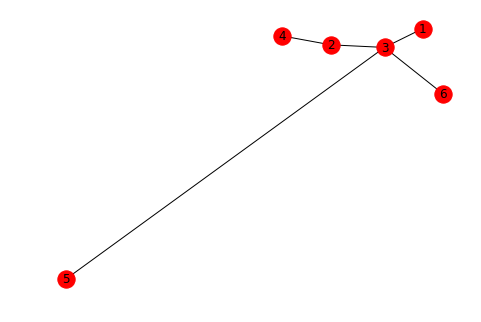

In [35]:
nx.draw_kamada_kawai(G, with_labels=True)

In [39]:
G1 = nx.Graph()

In [40]:
G1.add_weighted_edges_from([(1, 2, 1), (1, 3, 1.5), (1, 4, 2), (1, 5, 2.5), (1, 6, 3)])

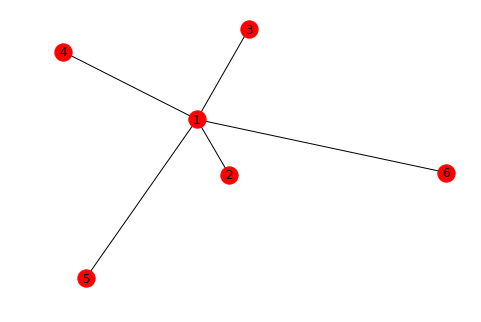

In [41]:
nx.draw_kamada_kawai(G1, with_labels=True)

In [43]:
G1.edges.data()

EdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 1.5}), (1, 4, {'weight': 2}), (1, 5, {'weight': 2.5}), (1, 6, {'weight': 3})])